In [1]:
import pandas as pd
import openpyxl
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 1. INTRODUCTION : 

#### Data Source : https://data.unicef.org/resources/education-for-children-with-disabilities/

## 1.1 Attributes :

###### Countries and areas	:  
The UNICEF Global databases contain a set of 202 countries as reported on through the State of the World's Children Statistical Annex 2017 (column A)
	
###### Subject	:
This database provides information on varions education indicators (ANAR, OOS, Completion rate and Foundational skills) for children with and without functional difficulty

###### Indicator :	
Specifies indicators with the level of education or age group when relevant

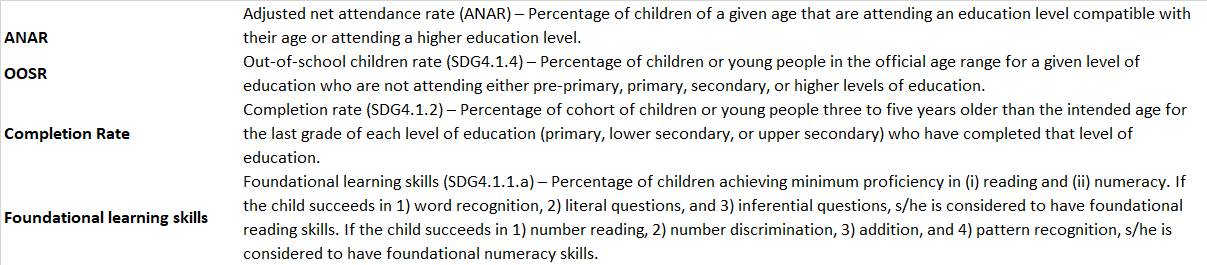
###### Category :	
Indicator values by category including total, sex (male and female) and location (urban and rural)
	
###### Total	: 
Total indicator values including children with and without functional difficulties (coloumn H - coloumn J)
###### Children without functional difficulty	: 
Indicator values of children without functional difficulties (coloumn K- coloumn M)
###### Children with functional difficulty	: 
Indicator values of children with functional difficulties (coloumn N-coloumn P)
	
	
###### Point estimate : 
Value of the indicator (coloumn H, coloumn K and coloumn N)
###### Upper limit	: 
95% upper confidence interval of the point estimate (coloumn I, coloumn L and coloumn O)
###### Lower Limit	:
95% lower confidence interval of the point estimate (coloumn J, coloumn M and coloumn P)






# 2. Data Reading & Cleaning

In [2]:
excel_file = pd.ExcelFile('Database-on-education-for-children-with-disabilities_2021.xlsx')
df = pd.DataFrame()

In [3]:
# Iterate through the sheets, excluding the first sheet (sheet 0)
for sheet_name in excel_file.sheet_names[1:]:
    # Load each sheet into a DataFrame and specify the header row
    sheet_data = excel_file.parse(sheet_name, header=0)  # Assumes the header is in the first row
    # Append the sheet data to the merged_data DataFrame
    df = df.append(sheet_data, ignore_index=True)

# If you want to reset the index
df = df.reset_index(drop=True)

In [4]:
df.rename(columns={'Total': 'Total(Point Estimate)','Unnamed: 8': 'Total(Upper Limit)', 'Unnamed: 9': 'Total(Lower Limit)','Children without functional difficulties': 'Children without functional difficulties(Point Estimate)','Unnamed: 11': 'Children without functional difficulties(Upper Limit)', 'Unnamed: 12': 'Children without functional difficulties(Lower Limit)','Children with functional difficulties': "Children with functional difficulties(Point Estimate)",'Unnamed: 14': 'Children with functional difficulties(Upper Limit)', 'Unnamed: 15': 'Children with functional difficulties(Lower Limit)'}, inplace=True)
# Drop the first row
df = df.drop(0)

# Reset the index if you want
df = df.reset_index(drop=True)

In [5]:
df.head()

,Countries and areas,ISO Code,Region,Sub-region,Development regions,Indicator,Category,Total(Point Estimate),Total(Upper Limit),Total(Lower Limit),Children without functional difficulties(Point Estimate),Children without functional difficulties(Upper Limit),Children without functional difficulties(Lower Limit),Children with functional difficulties(Point Estimate),Children with functional difficulties(Upper Limit),Children with functional difficulties(Lower Limit),Data source,Time period
0,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Total,82.7,83.3,82.1,83.7,84.3,83.1,72.1,74.6,69.6,MICS6,2019
1,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Male,80.1,81,79.2,81.4,82.3,80.5,68.1,71.5,64.6,MICS6,2019
2,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Female,85.3,86.1,84.5,86,86.9,85.2,76.8,80.2,73.3,MICS6,2019
3,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Urban,84.3,85.6,82.9,84.9,86.3,83.6,76.1,81.8,70.3,MICS6,2019
4,Bangladesh,BGD,SA,SA,Least Developed,ANAR Primary,Rural,82.2,82.9,81.5,83.3,84,82.7,71.2,73.9,68.5,MICS6,2019


### 2.1 Dropping the rows where countries and areas are null

In [6]:
df.dropna(subset=['Countries and areas'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1447
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Countries and areas                                       1440 non-null   object
 1   ISO Code                                                  1305 non-null   object
 2   Region                                                    1440 non-null   object
 3   Sub-region                                                1440 non-null   object
 4   Development regions                                       1395 non-null   object
 5   Indicator                                                 1440 non-null   object
 6   Category                                                  1440 non-null   object
 7   Total(Point Estimate)                                     1430 non-null   object
 8   Total(Upper Limit)          

### 2.2 Filling ISO code with appropriate values

In [8]:
df[df['ISO Code'].isnull()]['Countries and areas'].unique()

array(['Kosovo', 'Pakistan (Punjab)', 'Pakistan (Sindh)'], dtype=object)

In [9]:
# Assuming your DataFrame is named df
updated_iso_codes = {
    'Kosovo': 'KOS',
    'Pakistan (Punjab)': 'PAKP',
    'Pakistan (Sindh)': 'PAKS'
}

for country, iso_code in updated_iso_codes.items():
    df.loc[df['Countries and areas'] == country, 'ISO Code'] = iso_code


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1447
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Countries and areas                                       1440 non-null   object
 1   ISO Code                                                  1440 non-null   object
 2   Region                                                    1440 non-null   object
 3   Sub-region                                                1440 non-null   object
 4   Development regions                                       1395 non-null   object
 5   Indicator                                                 1440 non-null   object
 6   Category                                                  1440 non-null   object
 7   Total(Point Estimate)                                     1430 non-null   object
 8   Total(Upper Limit)          

### 2.3 Imputing the continous values with mode. 

We chose mode over mean and median because Imputing with the mode can help preserve the distribution of the data. It's especially useful when the majority of values in the column are concentrated around the mode. This can be important when you want to maintain the original characteristics of the data.

In [11]:
# Define the columns to impute with the mode
columns_to_impute_mode = [
    'Total(Upper Limit)', 'Total(Lower Limit)',
    'Children without functional difficulties(Upper Limit)', 'Children without functional difficulties(Lower Limit)',
    'Children with functional difficulties(Upper Limit)', 'Children with functional difficulties(Lower Limit)'
]

# Impute each column with its mode
for column in columns_to_impute_mode:
    mode = df[column].mode()[0]  # Calculate the mode (most frequent value)
    df[column] = df[column].fillna(mode)

# Verify that the null values have been imputed with the mode
print(df.isnull().sum())


Countries and areas                                           0
ISO Code                                                      0
Region                                                        0
Sub-region                                                    0
Development regions                                          45
Indicator                                                     0
Category                                                      0
Total(Point Estimate)                                        10
Total(Upper Limit)                                            0
Total(Lower Limit)                                            0
Children without functional difficulties(Point Estimate)     53
Children without functional difficulties(Upper Limit)         0
Children without functional difficulties(Lower Limit)         0
Children with functional difficulties(Point Estimate)       455
Children with functional difficulties(Upper Limit)            0
Children with functional difficulties(Lo

### 2.4 Imputing the Point estimate as the average of Upper and Lower limit for the specific category

In [12]:
import numpy as np

# Conditionally impute null values for 'Total(Point Estimate)'
mask = df['Total(Point Estimate)'].isnull()
df.loc[mask, 'Total(Point Estimate)'] = (df.loc[mask, 'Total(Upper Limit)'].astype(float) + df.loc[mask, 'Total(Lower Limit)'].astype(float)) / 2

# Conditionally impute null values for 'Children without functional difficulties(Point Estimate)'
mask = df['Children without functional difficulties(Point Estimate)'].isnull()
df.loc[mask, 'Children without functional difficulties(Point Estimate)'] = (df.loc[mask, 'Children without functional difficulties(Upper Limit)'].astype(float) + df.loc[mask, 'Children without functional difficulties(Lower Limit)'].astype(float)) / 2

# Conditionally impute null values for 'Children with functional difficulties(Point Estimate)'
mask = df['Children with functional difficulties(Point Estimate)'].isnull()
df.loc[mask, 'Children with functional difficulties(Point Estimate)'] = (df.loc[mask, 'Children with functional difficulties(Upper Limit)'].astype(float) + df.loc[mask, 'Children with functional difficulties(Lower Limit)'].astype(float)) / 2

# Verify that null values have been imputed
print(df.isnull().sum())


Countries and areas                                          0
ISO Code                                                     0
Region                                                       0
Sub-region                                                   0
Development regions                                         45
Indicator                                                    0
Category                                                     0
Total(Point Estimate)                                        0
Total(Upper Limit)                                           0
Total(Lower Limit)                                           0
Children without functional difficulties(Point Estimate)     0
Children without functional difficulties(Upper Limit)        0
Children without functional difficulties(Lower Limit)        0
Children with functional difficulties(Point Estimate)        0
Children with functional difficulties(Upper Limit)           0
Children with functional difficulties(Lower Limit)     

### 2.5 Converting the continous fields to Float data type so that we can perform various mathematical operations

In [13]:
# List of columns to convert to floats
float_columns = [
    'Total(Point Estimate)',
    'Total(Upper Limit)',
    'Total(Lower Limit)',
    'Children without functional difficulties(Point Estimate)',
    'Children without functional difficulties(Upper Limit)',
    'Children without functional difficulties(Lower Limit)',
    'Children with functional difficulties(Point Estimate)',
    'Children with functional difficulties(Upper Limit)',
    'Children with functional difficulties(Lower Limit)'
]

# Loop through the columns and convert them to floats
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1447
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Countries and areas                                       1440 non-null   object 
 1   ISO Code                                                  1440 non-null   object 
 2   Region                                                    1440 non-null   object 
 3   Sub-region                                                1440 non-null   object 
 4   Development regions                                       1395 non-null   object 
 5   Indicator                                                 1440 non-null   object 
 6   Category                                                  1440 non-null   object 
 7   Total(Point Estimate)                                     1440 non-null   float64
 8   Total(Upper Limit)

### 2.6 Outlier Handling

#### 2.6.1 Let's see if there's any outliers in Point estimate field for Total, with disability and without disability column.

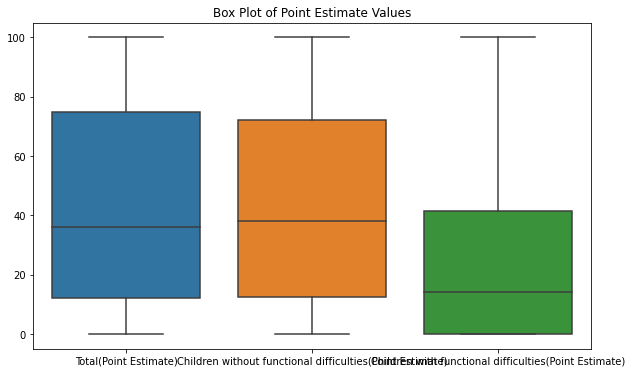

<Figure size 720x432 with 0 Axes>

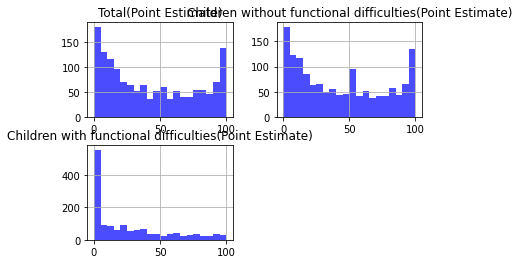

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have your data in a DataFrame named 'df'

# Box plots to visualize the distribution and detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Total(Point Estimate)', 'Children without functional difficulties(Point Estimate)', 'Children with functional difficulties(Point Estimate)']])
plt.title('Box Plot of Point Estimate Values')

# Display the plot
plt.show()

# Histograms to visualize the distribution
plt.figure(figsize=(10, 6))
df[['Total(Point Estimate)', 'Children without functional difficulties(Point Estimate)', 'Children with functional difficulties(Point Estimate)']].hist(bins=20, alpha=0.7, color='b')
plt.title('Histogram of Total Values')

# Display the plot
plt.show()


Since, there's no outliers as shown in box plot. We can move ahead with the analysis

#### 2.6.2 Let's see if there are outliers for different indicators. 

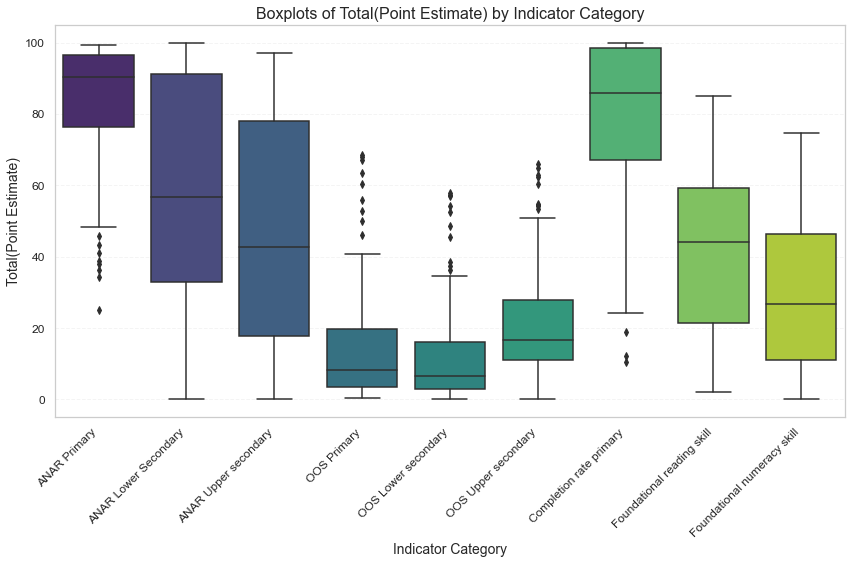

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a boxplot for each category in 'Indicator'
sns.boxplot(x='Indicator', y='Total(Point Estimate)', data=df, palette='viridis')  # You can choose a different palette

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set plot title and labels
plt.title('Boxplots of Total(Point Estimate) by Indicator Category', fontsize=16)
plt.xlabel('Indicator Category', fontsize=14)
plt.ylabel('Total(Point Estimate)', fontsize=14)

# Add grid lines to the y-axis for better reference
plt.grid(axis='y', linestyle='--', alpha=0.2)

# Customize tick labels for better readability
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a tight layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


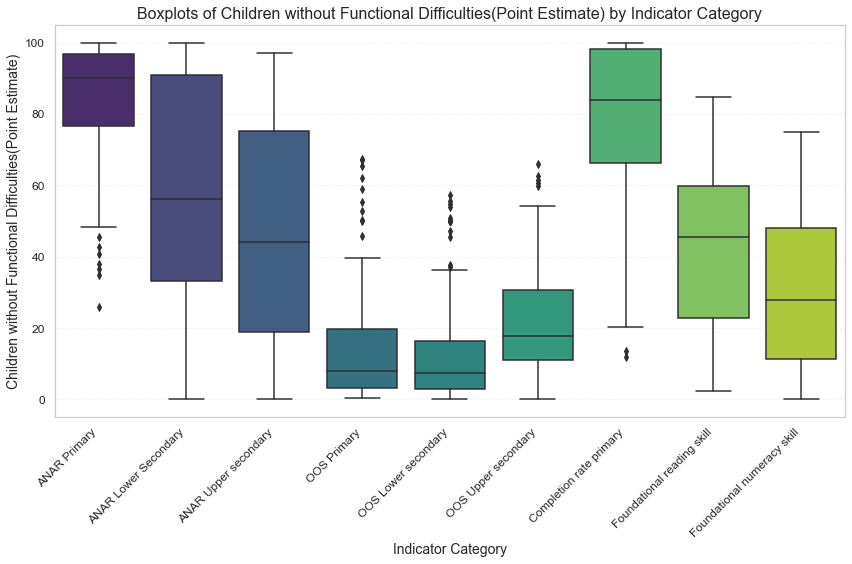

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a boxplot for each category in 'Indicator'
sns.boxplot(x='Indicator', y='Children without functional difficulties(Point Estimate)', data=df, palette='viridis')  # You can choose a different palette

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set plot title and labels
plt.title('Boxplots of Children without Functional Difficulties(Point Estimate) by Indicator Category', fontsize=16)
plt.xlabel('Indicator Category', fontsize=14)
plt.ylabel('Children without Functional Difficulties(Point Estimate)', fontsize=14)

# Add grid lines to the y-axis for better reference
plt.grid(axis='y', linestyle='--', alpha=0.2)

# Customize tick labels for better readability
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a legend if needed
# plt.legend(loc='upper right')

# Add a tight layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


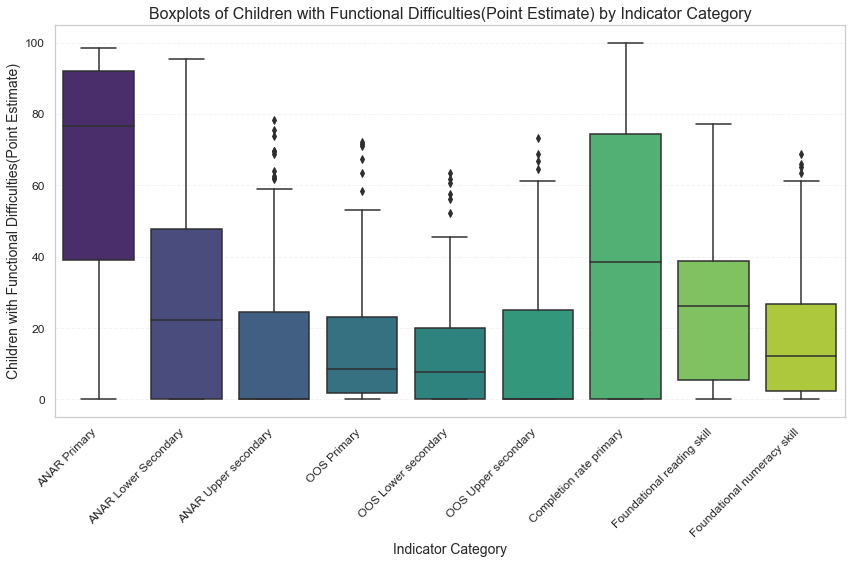

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Create a boxplot for each category in 'Indicator'
sns.boxplot(x='Indicator', y='Children with functional difficulties(Point Estimate)', data=df, palette='viridis')  # You can choose a different palette

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set plot title and labels
plt.title('Boxplots of Children with Functional Difficulties(Point Estimate) by Indicator Category', fontsize=16)
plt.xlabel('Indicator Category', fontsize=14)
plt.ylabel('Children with Functional Difficulties(Point Estimate)', fontsize=14)

# Add grid lines to the y-axis for better reference
plt.grid(axis='y', linestyle='--', alpha=0.2)

# Customize tick labels for better readability
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a legend if needed
# plt.legend(loc='upper right')

# Add a tight layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


#### 2.6.3 It is obvious from the box plot that there are several outliers for each category. We will get rid of these outliers as they can cause a bias in our analysis

In [19]:
# Define a function to detect outliers using the IQR method
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

In [20]:
grouped = df.groupby('Indicator')
df.shape

(1440, 18)

In [21]:
# Iterate through the groups and remove outliers for Total
for category, group in grouped:
    print(category)
    outlier = find_outliers_iqr(group['Total(Point Estimate)'])
    print(outlier.index)

ANAR Lower Secondary
Int64Index([], dtype='int64')
ANAR Primary
Int64Index([15, 16, 17, 19, 115, 116, 117, 119], dtype='int64')
ANAR Upper secondary
Int64Index([], dtype='int64')
Completion rate primary
Int64Index([980, 985, 1005], dtype='int64')
Foundational numeracy skill
Int64Index([], dtype='int64')
Foundational reading skill
Int64Index([], dtype='int64')
OOS Lower secondary
Int64Index([659, 660, 661, 663, 673, 718, 759, 760, 761, 763], dtype='int64')
OOS Primary
Int64Index([498, 499, 500, 502, 522, 598, 599, 600, 602], dtype='int64')
OOS Upper secondary
Int64Index([820, 822, 824, 875, 876, 877, 879, 922, 924], dtype='int64')


In [22]:
# Iterate through the groups and remove outliers for Children without functional difficulties
for category, group in grouped:
    print(category)
    outliers = find_outliers_iqr(group['Children without functional difficulties(Point Estimate)'])
    print(outliers.index)

ANAR Lower Secondary
Int64Index([], dtype='int64')
ANAR Primary
Int64Index([15, 17, 19, 115, 116, 117, 119], dtype='int64')
ANAR Upper secondary
Int64Index([], dtype='int64')
Completion rate primary
Int64Index([980, 1005], dtype='int64')
Foundational numeracy skill
Int64Index([], dtype='int64')
Foundational reading skill
Int64Index([], dtype='int64')
OOS Lower secondary
Int64Index([659, 660, 661, 663, 673, 759, 760, 761, 763, 770, 771, 773, 795,
            796, 797, 798],
           dtype='int64')
OOS Primary
Int64Index([498, 499, 500, 502, 522, 598, 599, 600, 602, 612], dtype='int64')
OOS Upper secondary
Int64Index([822, 824, 879, 922, 924], dtype='int64')


In [23]:
# Iterate through the groups and remove outliers for Children with functional difficulties
for category, group in grouped:
    print(category)
    outliers = find_outliers_iqr(group['Children with functional difficulties(Point Estimate)'])
    print(outliers.index)

ANAR Lower Secondary
Int64Index([], dtype='int64')
ANAR Primary
Int64Index([], dtype='int64')
ANAR Upper secondary
Int64Index([362, 412, 413, 414, 415, 416, 422, 423, 424, 426], dtype='int64')
Completion rate primary
Int64Index([], dtype='int64')
Foundational numeracy skill
Int64Index([1293, 1294, 1296, 1423], dtype='int64')
Foundational reading skill
Int64Index([], dtype='int64')
OOS Lower secondary
Int64Index([659, 660, 661, 663, 761, 763], dtype='int64')
OOS Primary
Int64Index([498, 499, 500, 502, 600, 602], dtype='int64')
OOS Upper secondary
Int64Index([822, 824, 922, 924], dtype='int64')


In [24]:
outlier_indexes = [15, 16, 17, 19, 115, 116, 117, 119,362, 412, 413, 414, 415, 416, 422, 423, 424, 426, 498, 499, 500, 502, 522, 598, 599, 600, 602,659, 660, 661, 663, 673, 718, 759, 760, 761, 763, 770, 771, 773, 795, 796,797, 798, 820, 822, 824, 875, 876, 877, 879, 922, 924,980, 985, 1005,1293, 1294, 1296, 1423 ]

df = df[~df.index.isin(outlier_indexes)]

In [25]:
df.shape

(1380, 18)

# 3. Analysis and Visualization

###  3.1 Question : Which Country has the highest Percentage of children of a given age that are attending an education level compatible with their age or attending a higher education level?

In [26]:
ANAR = df[df['Indicator'].str.startswith('ANAR')]
OOS = df[df['Indicator'].str.startswith('OOS')]
Completion = df[df['Indicator'].str.startswith('Completion')]
Reading = df[df['Indicator'].str.contains("reading")]
Numeracy = df[df['Indicator'].str.contains("numeracy")]

In [27]:
ANAR_primary_Total = ANAR[(ANAR['Indicator'] == 'ANAR Primary') & (ANAR['Category'] == 'Total')]

# Group the filtered data by 'Countries'
grouped = ANAR_primary_Total.groupby(['Countries and areas','Category'])

# Calculate the mean, median, and standard deviation for each group
summary_stats = grouped['Total(Point Estimate)'].agg(['max'])

sorted_summary1 = summary_stats.sort_values(by='max', ascending=False)
# Display the summary statistics
sorted_summary1.head()

,,max
Countries and areas,Category,
Turkmenistan,Total,98.7
Kiribati,Total,97.4
Turks and Caicos Islands,Total,97.4
Lesotho,Total,97.2
Tonga,Total,97.0


In [28]:
ANAR_lower_Total = ANAR[(ANAR['Indicator'] == 'ANAR Lower Secondary') & (ANAR['Category'] == 'Total')]

# Group the filtered data by 'Countries'
grouped = ANAR_lower_Total.groupby(['Countries and areas','Category'])

# Calculate the mean, median, and standard deviation for each group
summary_stats = grouped['Total(Point Estimate)'].agg(['max'])

sorted_summary2 = summary_stats.sort_values(by='max', ascending=False)
# Display the summary statistics
sorted_summary2.head()

,,max
Countries and areas,Category,
North Macedonia,Total,99.2
Turkmenistan,Total,97.7
Kyrgyzstan,Total,96.2
Kosovo,Total,94.5
Tonga,Total,94.0


In [29]:
ANAR_lower_Total = ANAR[(ANAR['Indicator'] == 'ANAR Upper secondary') & (ANAR['Category'] == 'Total')]

# Group the filtered data by 'Countries'
grouped = ANAR_lower_Total.groupby(['Countries and areas','Category'])

# Calculate the mean, median, and standard deviation for each group
summary_stats = grouped['Total(Point Estimate)'].agg(['max'])

sorted_summary3 = summary_stats.sort_values(by='max', ascending=False)
# Display the summary statistics
sorted_summary3.head()

,,max
Countries and areas,Category,
Turkmenistan,Total,95.8
Kosovo,Total,87.6
Belarus,Total,86.9
North Macedonia,Total,83.5
Tuvalu,Total,82.6


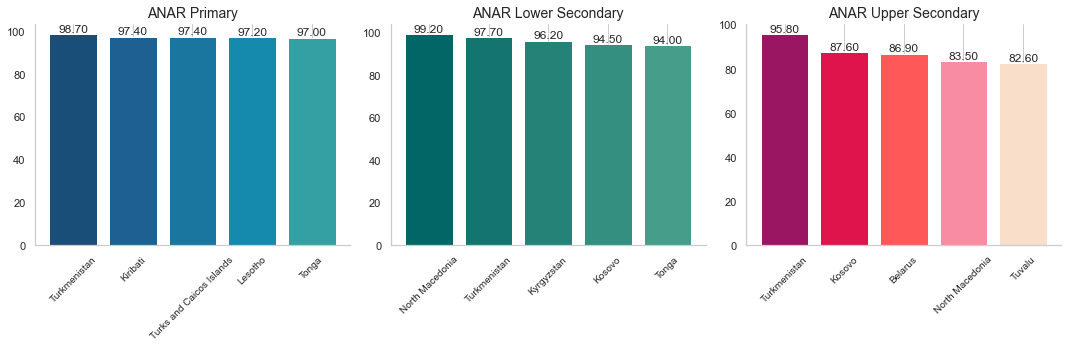

In [30]:
import matplotlib.pyplot as plt

# Assuming you have three summary dataframes: sorted_summary1, sorted_summary2, and sorted_summary3

# Create subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define custom colors for the bars
colors1 = ['#036666', '#14746f', '#248277', '#358f80', '#469d89']
colors2 = ['#184e77', '#1e6091', '#1a759f', '#168aad', '#34a0a4']
colors3 = ['#9A1663', '#E0144C', '#FF5858', '#F78CA2', '#F9DEC9']

# Plot the first summary dataframe (ANAR Primary Total)
bars1 = axs[0].bar(sorted_summary1.head().index.get_level_values('Countries and areas'), sorted_summary1['max'].head(), color=colors2)
axs[0].set_title('ANAR Primary', fontsize=14)
axs[0].tick_params(axis='x', rotation=45, labelsize=10)

# Plot the second summary dataframe (ANAR Lower Secondary Total)
bars2 = axs[1].bar(sorted_summary2.head().index.get_level_values('Countries and areas'), sorted_summary2['max'].head(), color=colors1)
axs[1].set_title('ANAR Lower Secondary', fontsize=14)
axs[1].tick_params(axis='x', rotation=45, labelsize=10)

# Plot the third summary dataframe (ANAR Upper Secondary Total)
bars3 = axs[2].bar(sorted_summary3.head().index.get_level_values('Countries and areas'), sorted_summary3['max'].head(), color=colors3)
axs[2].set_title('ANAR Upper Secondary', fontsize=14)
axs[2].tick_params(axis='x', rotation=45, labelsize=10)

# Remove the x-axis label from the second and third subplots to avoid clutter
axs[1].set_xlabel('')
axs[2].set_xlabel('')

# Remove spines
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Customize grid lines
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.3, color='white')

# Add values on top of the bars
for bar, value in zip(bars1, sorted_summary1['max'].head()):
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{value:.2f}', ha='center', va='bottom')

for bar, value in zip(bars2, sorted_summary2['max'].head()):
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{value:.2f}', ha='center', va='bottom')

for bar, value in zip(bars3, sorted_summary3['max'].head()):
    axs[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Adjust the layout to prevent overlap of labels
plt.tight_layout()

# Display the plot
plt.show()


### 3.2 Question : Which Country has the highest Percentage of children or young people in the official age range for a given level of education who are not attending either pre-primary, primary, secondary, or higher levels of education?

In [31]:
OOS_primary_Total = OOS[(OOS['Indicator'] == 'OOS Primary') & (OOS['Category'] == 'Total')]

# Group the filtered data by 'Countries'
grouped = OOS_primary_Total.groupby(['Countries and areas','Category'])

# Calculate the mean, median, and standard deviation for each group
summary_stats = grouped['Total(Point Estimate)'].agg(['max'])

sorted_summary1 = summary_stats.sort_values(by='max', ascending=False)
# Display the summary statistics
sorted_summary1.head()

,,max
Countries and areas,Category,
Guinea-Bissau,Total,35.0
Democratic Republic of the Congo,Total,32.5
Central African Republic,Total,32.3
Madagascar,Total,30.6
Sierra Leone,Total,27.1


In [32]:
OOS_primary_Total = OOS[(OOS['Indicator'] == 'OOS Lower secondary') & (OOS['Category'] == 'Total')]

# Group the filtered data by 'Countries'
grouped = OOS_primary_Total.groupby(['Countries and areas','Category'])

# Calculate the mean, median, and standard deviation for each group
summary_stats = grouped['Total(Point Estimate)'].agg(['max'])

sorted_summary2 = summary_stats.sort_values(by='max', ascending=False)
# Display the summary statistics
sorted_summary2.head()

,,max
Countries and areas,Category,
Madagascar,Total,32.2
Gambia,Total,23.8
Central African Republic,Total,21.6
Iraq,Total,21.1
Pakistan (Punjab),Total,18.9


In [33]:
OOS_primary_Total = OOS[(OOS['Indicator'] == 'OOS Upper secondary') & (OOS['Category'] == 'Total')]

# Group the filtered data by 'Countries'
grouped = OOS_primary_Total.groupby(['Countries and areas','Category'])

# Calculate the mean, median, and standard deviation for each group
summary_stats = grouped['Total(Point Estimate)'].agg(['max'])

sorted_summary3 = summary_stats.sort_values(by='max', ascending=False)
# Display the summary statistics
sorted_summary3.head()

,,max
Countries and areas,Category,
Pakistan (Sindh),Total,50.9
Iraq,Total,37.2
Central African Republic,Total,33.0
Pakistan (Punjab),Total,32.7
Gambia,Total,31.3


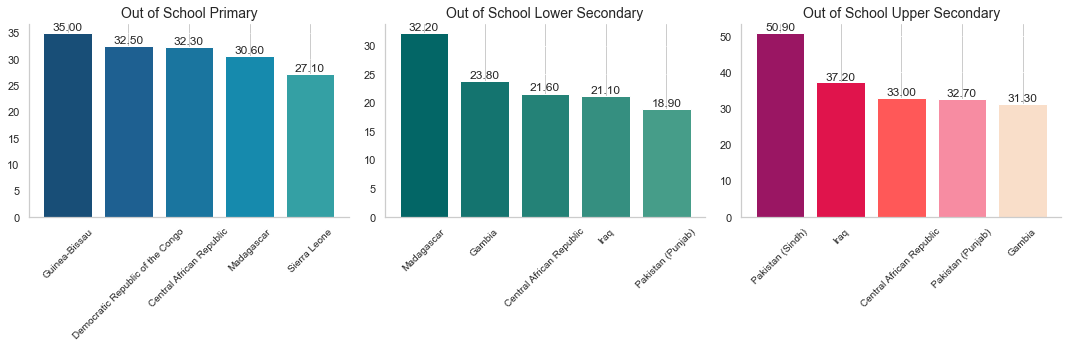

In [34]:
import matplotlib.pyplot as plt

# Assuming you have three summary dataframes: sorted_summary1, sorted_summary2, and sorted_summary3

# Create subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define custom colors for the bars
colors1 = ['#036666', '#14746f', '#248277', '#358f80', '#469d89']
colors2 = ['#184e77', '#1e6091', '#1a759f', '#168aad', '#34a0a4']
colors3 = ['#9A1663', '#E0144C', '#FF5858', '#F78CA2', '#F9DEC9']

# Plot the first summary dataframe (OOS Primary Total)
bars1 = axs[0].bar(sorted_summary1.head().index.get_level_values('Countries and areas'), sorted_summary1['max'].head(), color=colors2)
axs[0].set_title('Out of School Primary', fontsize=14)
axs[0].tick_params(axis='x', rotation=45, labelsize=10)

# Plot the second summary dataframe (OOS Lower Secondary Total)
bars2 = axs[1].bar(sorted_summary2.head().index.get_level_values('Countries and areas'), sorted_summary2['max'].head(), color=colors1)
axs[1].set_title('Out of School Lower Secondary', fontsize=14)
axs[1].tick_params(axis='x', rotation=45, labelsize=10)

# Plot the third summary dataframe (OOS Upper Secondary Total)
bars3 = axs[2].bar(sorted_summary3.head().index.get_level_values('Countries and areas'), sorted_summary3['max'].head(), color=colors3)
axs[2].set_title('Out of School Upper Secondary', fontsize=14)
axs[2].tick_params(axis='x', rotation=45, labelsize=10)

# Remove the x-axis label from the second and third subplots to avoid clutter
axs[1].set_xlabel('')
axs[2].set_xlabel('')

# Remove spines
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Customize grid lines
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Add values on top of the bars
for bar, value in zip(bars1, sorted_summary1['max'].head()):
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{value:.2f}', ha='center', va='bottom')

for bar, value in zip(bars2, sorted_summary2['max'].head()):
    axs[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{value:.2f}', ha='center', va='bottom')

for bar, value in zip(bars3, sorted_summary3['max'].head()):
    axs[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Adjust the layout to prevent overlap of labels
plt.tight_layout()

# Display the plot
plt.show()


### 3.3 Question : Is there a correlation between the percentage of children attending an appropriate education level and the severity of functional difficulties within the group of children with disabilities?

In [35]:
ANAR_all = ANAR[ANAR['Category'] == 'Total']

In [36]:
Disability_point_estimate_stats = ANAR_all['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_stats = ANAR_all['Children with functional difficulties(Point Estimate)'].describe()

print("Without Disability Point Estimate Stats:")
print(Disability_point_estimate_stats)
print("\nWith Disability Point Estimate Stats:")
print(WithoutDisability_upper_limit_stats)


Without Disability Point Estimate Stats:
count    91.000000
mean     63.150549
std      31.686118
min       0.100000
25%      36.400000
50%      75.100000
75%      92.400000
max      99.400000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats:
count    91.000000
mean     41.240659
std      36.916564
min       0.000000
25%       0.000000
50%      32.900000
75%      78.900000
max      97.300000
Name: Children with functional difficulties(Point Estimate), dtype: float64


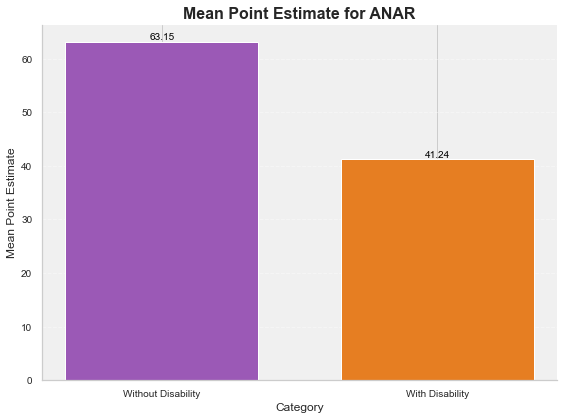

In [37]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding means
categories = ['Without Disability', 'With Disability']
means = [63.150549, 41.240659]  

# Define custom colors
colors = ['#9b59b6','#e67e22']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart
bars = ax.bar(categories, means, color=colors, width = 0.7)

# Set a light gray background color
ax.set_facecolor('#f0f0f0')

# Customize the plot title and labels
ax.set_title('Mean Point Estimate for ANAR', fontsize=16, fontweight='bold')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Mean Point Estimate', fontsize=12)

# Customize grid lines
ax.grid(axis='y', linestyle='--', alpha=0.4, color='white')

# Add data labels above the bars
for bar, mean in zip(bars, means):
    ax.text(bar.get_x() + bar.get_width() / 2, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=10, color='black')

# Adjust the figure spacing
plt.tight_layout()

# Display the plot
plt.show()


Significant Difference in Mean Point Estimates: There is a notable difference in the mean point estimate between the two categories. Children without functional difficulties have a higher mean point estimate (approximately 63.15) compared to children with functional difficulties (approximately 41.24). This indicates that, on average, a higher percentage of children without functional difficulties attend an education level compatible with their age or higher.

Wide Variability: Both groups exhibit a wide range of values, as indicated by the standard deviations. Children with functional difficulties have a higher standard deviation (approximately 36.92) compared to those without functional difficulties (approximately 31.69). This suggests that the percentage of children attending the appropriate education level varies more within the group of children with functional difficulties.

### 3.4 Question : Is there a correlation between the percentage of children attending an appropriate education level and the severity of functional difficulties within the group of children with disabilities?

In [38]:
OOS_all = OOS[OOS['Category'] == 'Total']

In [39]:
Disability_point_estimate_stats = OOS_all['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_stats = OOS_all['Children with functional difficulties(Point Estimate)'].describe()

print("Without Disability Point Estimate Stats:")
print(Disability_point_estimate_stats)
print("\nWith Disability Point Estimate Stats:")
print(WithoutDisability_upper_limit_stats)


Without Disability Point Estimate Stats:
count    90.000000
mean     13.018889
std      11.280160
min       0.000000
25%       4.300000
50%      10.500000
75%      18.150000
max      50.900000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats:
count    90.000000
mean     13.276667
std      12.846641
min       0.000000
25%       1.050000
50%       9.700000
75%      22.525000
max      51.000000
Name: Children with functional difficulties(Point Estimate), dtype: float64


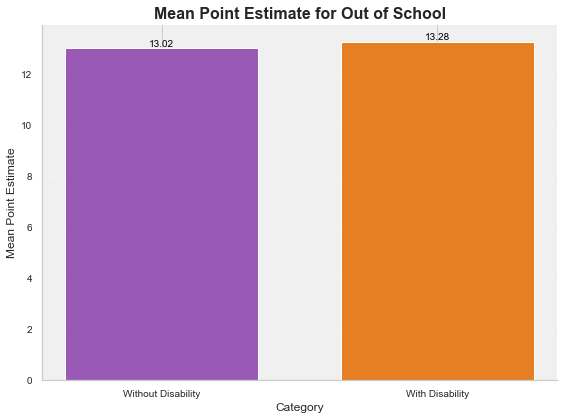

In [40]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding means
categories = ['Without Disability', 'With Disability']
means = [13.018889, 13.276667]

# Define custom colors
colors = ['#9b59b6','#e67e22']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart
bars = ax.bar(categories, means, color=colors, width = 0.7)

# Set a light gray background color
ax.set_facecolor('#f0f0f0')

# Customize the plot title and labels
ax.set_title('Mean Point Estimate for Out of School', fontsize=16, fontweight='bold')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Mean Point Estimate', fontsize=12)

# Customize grid lines
ax.grid(axis='y', linestyle='--', alpha=0.3, color='white')

# Add data labels above the bars
for bar, mean in zip(bars, means):
    ax.text(bar.get_x() + bar.get_width() / 2, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=10, color='black')

# Adjust the figure spacing
plt.tight_layout()

# Display the plot
plt.show()



Similar Mean Point Estimates: The mean point estimate for the number of "People out of school" is quite similar for both groups. Children with functional difficulties have a slightly higher mean point estimate (approximately 13.28) compared to children without functional difficulties (approximately 13.02). However, the difference in the means is relatively small.

Wide Variability: Both groups exhibit a wide range of values, as indicated by the standard deviations. Children with functional difficulties have a higher standard deviation (approximately 12.85) compared to those without functional difficulties (approximately 11.28). This suggests that the number of "People out of school" varies more within the group of children with functional difficulties..

### 3.5 Question : Is there a statistically significant difference in the percentage of children attending an education level compatible with their age or higher between rural and urban areas?

In [41]:
ANAR_rural = ANAR[ANAR['Category'] == 'Rural']
ANAR_urban = ANAR[ANAR['Category'] == 'Urban']

In [42]:
Total_point_estimate_rural = ANAR_rural['Total(Point Estimate)'].describe()
Disability_point_estimate_rural = ANAR_rural['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_rural = ANAR_rural['Children with functional difficulties(Point Estimate)'].describe()

print("Total Point Estimate Stats for Rural:")
print(Total_point_estimate_rural)
print("\nWithout Disability Point Estimate Stats for Rural:")
print(Disability_point_estimate_rural)
print("\nWith Disability Point Estimate Stats for Rural:")
print(WithoutDisability_upper_limit_rural)

Total Point Estimate Stats for Rural:
count     92.000000
mean      58.630435
std       34.504708
min        0.000000
25%       22.675000
50%       67.850000
75%       91.400000
max      100.000000
Name: Total(Point Estimate), dtype: float64

Without Disability Point Estimate Stats for Rural:
count    92.000000
mean     57.496739
std      33.880850
min       0.000000
25%      23.000000
50%      62.600000
75%      91.000000
max      99.300000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats for Rural:
count    92.000000
mean     33.821739
std      36.671655
min       0.000000
25%       0.000000
50%      18.450000
75%      67.900000
max      98.000000
Name: Children with functional difficulties(Point Estimate), dtype: float64


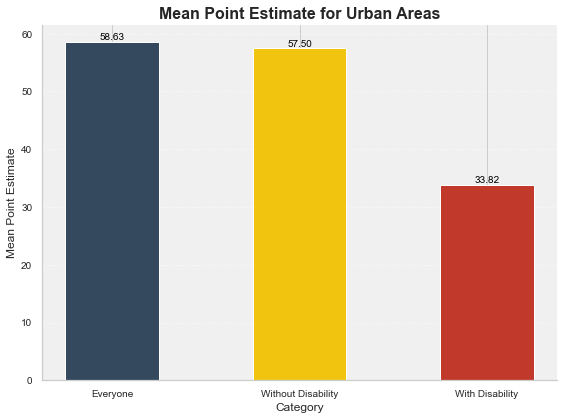

In [43]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding means
categories = ['Everyone','Without Disability', 'With Disability']
means = [58.630435,57.496739,33.821739]  


# Define custom colors
colors = ['#34495e', '#f1c40f', '#c0392b']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart
bars = ax.bar(categories, means, color=colors, width = 0.5)

# Set a light gray background color
ax.set_facecolor('#f0f0f0')

# Customize the plot title and labels
ax.set_title('Mean Point Estimate for Urban Areas', fontsize=16, fontweight='bold')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Mean Point Estimate', fontsize=12)

# Customize grid lines
ax.grid(axis='y', linestyle='--', alpha=0.4, color='white')

# Add data labels above the bars
for bar, mean in zip(bars, means):
    ax.text(bar.get_x() + bar.get_width() / 2, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=10, color='black')

# Adjust the figure spacing
plt.tight_layout()

# Display the plot
plt.show()



In [44]:
Total_point_estimate_urban = ANAR_urban['Total(Point Estimate)'].describe()
Disability_point_estimate_urban = ANAR_urban['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_urban = ANAR_urban['Children with functional difficulties(Point Estimate)'].describe()

print("Total Point Estimate Stats for Urban:")
print(Total_point_estimate_urban)
print("\nWithout Disability Point Estimate Stats for Urban:")
print(Disability_point_estimate_urban)
print("\nWith Disability Point Estimate Stats for Urban:")
print(WithoutDisability_upper_limit_urban)

Total Point Estimate Stats for Urban:
count    95.000000
mean     67.785263
std      28.803524
min       0.200000
25%      46.900000
50%      79.300000
75%      92.500000
max      99.600000
Name: Total(Point Estimate), dtype: float64

Without Disability Point Estimate Stats for Urban:
count     95.000000
mean      67.148421
std       28.590632
min        0.200000
25%       47.850000
50%       76.400000
75%       92.900000
max      100.000000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats for Urban:
count    95.000000
mean     32.358947
std      35.523149
min       0.000000
25%       0.000000
50%      21.200000
75%      64.150000
max      97.500000
Name: Children with functional difficulties(Point Estimate), dtype: float64


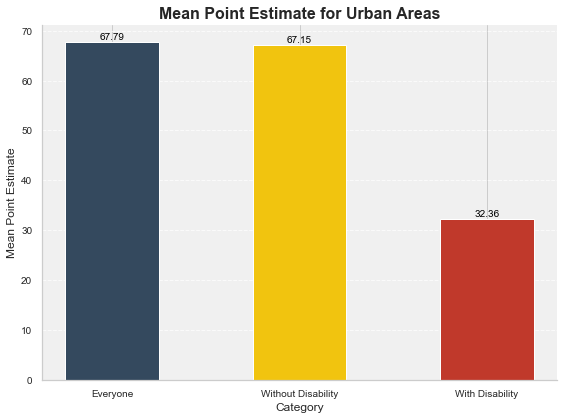

In [45]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding means
categories = ['Everyone', 'Without Disability', 'With Disability']
means = [67.785263, 67.148421, 32.358947]

# Define custom colors
colors = ['#34495e', '#f1c40f', '#c0392b']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart
bars = ax.bar(categories, means, color=colors, width = 0.5)

# Set a light gray background color
ax.set_facecolor('#f0f0f0')

# Customize the plot title and labels
ax.set_title('Mean Point Estimate for Urban Areas', fontsize=16, fontweight='bold')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Mean Point Estimate', fontsize=12)

# Customize grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Add data labels above the bars
for bar, mean in zip(bars, means):
    ax.text(bar.get_x() + bar.get_width() / 2, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=10, color='black')

# Adjust the figure spacing
plt.tight_layout()

# Display the plot
plt.show()


In rural areas, the average percentage of children attending an appropriate education level is lower than in urban areas.

Among rural areas, children without functional difficulties tend to have a higher average attendance percentage compared to children with functional difficulties.

In urban areas, children without functional difficulties have a slightly higher average attendance percentage compared to children with functional difficulties.

There is variability in the attendance percentages across all categories and areas, and in some cases, there are instances where no children attend the appropriate education level.

### 3.6 Question : Are there statistically significant correlations between OOS( Out of School) rates for children in rural and urban areas?

In [46]:
OOS_rural = OOS[OOS['Category'] == 'Rural']
OOS_urban = OOS[OOS['Category'] == 'Urban']

In [47]:
Total_point_estimate_rural = OOS_rural['Total(Point Estimate)'].describe()
Disability_point_estimate_rural = OOS_rural['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_rural = OOS_rural['Children with functional difficulties(Point Estimate)'].describe()

print("Total Point Estimate Stats for Rural:")
print(Total_point_estimate_rural)
print("\nWithout Disability Point Estimate Stats for Rural:")
print(Disability_point_estimate_rural)
print("\nWith Disability Point Estimate Stats for Rural:")
print(WithoutDisability_upper_limit_rural)

Total Point Estimate Stats for Rural:
count    84.000000
mean     15.353571
std      12.789222
min       0.000000
25%       4.825000
50%      12.650000
75%      23.550000
max      45.500000
Name: Total(Point Estimate), dtype: float64

Without Disability Point Estimate Stats for Rural:
count    84.000000
mean     16.041667
std      13.997755
min       0.000000
25%       4.900000
50%      12.650000
75%      25.550000
max      50.000000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats for Rural:
count    84.000000
mean     13.389286
std      14.740887
min       0.000000
25%       0.000000
50%       8.300000
75%      24.100000
max      51.900000
Name: Children with functional difficulties(Point Estimate), dtype: float64


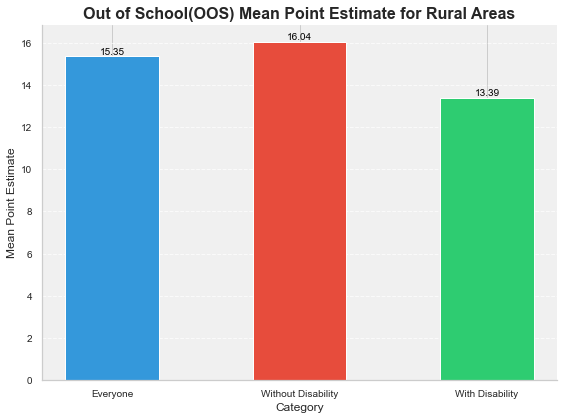

In [48]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding means
categories = ['Everyone', 'Without Disability', 'With Disability']
means = [15.353571, 16.041667, 13.389286]

# Define custom colors
colors = ['#3498db', '#e74c3c', '#2ecc71']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart
bars = ax.bar(categories, means, color=colors, width = 0.5)

# Set a light gray background color
ax.set_facecolor('#f0f0f0')

# Customize the plot title and labels
ax.set_title('Out of School(OOS) Mean Point Estimate for Rural Areas', fontsize=16, fontweight='bold')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Mean Point Estimate', fontsize=12)

# Customize grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Add data labels above the bars
for bar, mean in zip(bars, means):
    ax.text(bar.get_x() + bar.get_width() / 2, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=10, color='black')

# Adjust the figure spacing
plt.tight_layout()

# Display the plot
plt.show()


In [49]:
Total_point_estimate_urban = OOS_urban['Total(Point Estimate)'].describe()
Disability_point_estimate_urban = OOS_urban['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_urban = OOS_urban['Children with functional difficulties(Point Estimate)'].describe()

print("Total Point Estimate Stats for Urban:")
print(Total_point_estimate_urban)
print("\nWithout Disability Point Estimate Stats for Urban:")
print(Disability_point_estimate_urban)
print("\nWith Disability Point Estimate Stats for Urban:")
print(WithoutDisability_upper_limit_urban)

Total Point Estimate Stats for Urban:
count    95.000000
mean     10.977895
std       9.559380
min       0.000000
25%       3.400000
50%       8.200000
75%      15.350000
max      40.600000
Name: Total(Point Estimate), dtype: float64

Without Disability Point Estimate Stats for Urban:
count    95.000000
mean     11.797895
std      11.520555
min       0.000000
25%       3.100000
50%       8.500000
75%      15.500000
max      50.000000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats for Urban:
count    95.000000
mean      9.854737
std      12.924320
min       0.000000
25%       0.000000
50%       3.700000
75%      15.300000
max      50.400000
Name: Children with functional difficulties(Point Estimate), dtype: float64


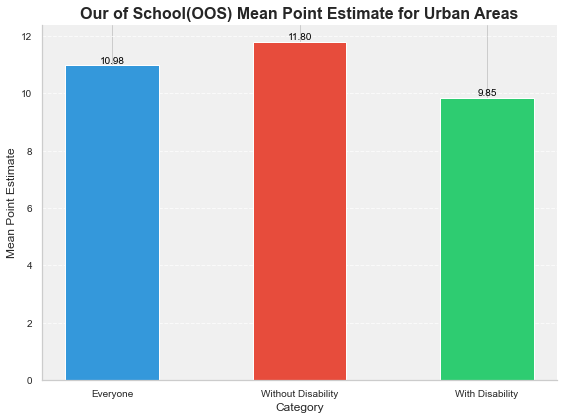

In [50]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding means
categories = ['Everyone', 'Without Disability', 'With Disability']
means = [10.977895, 11.797895, 9.854737]

# Define custom colors
colors = ['#3498db', '#e74c3c', '#2ecc71']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar chart with slimmer bars
bars = ax.bar(categories, means, color=colors, width=0.5)

# Set a light gray background color
ax.set_facecolor('#f0f0f0')

# Customize the plot title and labels
ax.set_title('Our of School(OOS) Mean Point Estimate for Urban Areas', fontsize=16, fontweight='bold')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Mean Point Estimate', fontsize=12)

# Customize grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7, color='white')

# Add data labels above the bars
for bar, mean in zip(bars, means):
    ax.text(bar.get_x() + bar.get_width() / 2, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=10, color='black')

# Adjust the figure spacing
plt.tight_layout()

# Display the plot
plt.show()


In both rural and urban areas, children without functional difficulties tend to have slightly higher OOS rates compared to children with functional difficulties.

Rural areas, on average, have higher OOS rates compared to urban areas, indicating that a higher percentage of children in rural areas are not attending school.

The presence of disabilities may have an impact on OOS rates, with children with disabilities having slightly lower OOS rates on average.

The data suggests that efforts may be needed to improve school attendance rates, particularly in rural areas, and to address the educational needs of children, especially those without functional difficulties. Further analysis and interventions are required to understand the factors contributing to OOS rates and to develop strategies for increasing school attendance.

# 4. Hypothesis Testing

### Question: Do gender-based disparities exist in ANAR for children with functional difficulties compared to those without functional difficulties?

Null Hypothesis (H0): There is no significant difference in attendance rates between male and female children.

Alternative Hypothesis (H1): There is a significant difference in attendance rates between male and female children.

In [51]:
ANAR_male = ANAR[ANAR['Category'] == 'Male']
ANAR_female = ANAR[ANAR['Category'] == 'Female']

In [52]:
Total_point_estimate_male = ANAR_male['Total(Point Estimate)'].describe()
Disability_point_estimate_male = ANAR_male['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_male = ANAR_male['Children with functional difficulties(Point Estimate)'].describe()

print("Total Point Estimate Stats for Male:")
print(Total_point_estimate_male)
print("\nWithout Disability Point Estimate Stats for Male:")
print(Disability_point_estimate_male)
print("\nWith Disability Point Estimate Stats for Male:")
print(WithoutDisability_upper_limit_male)

Total Point Estimate Stats for Male:
count    92.00000
mean     61.60000
std      31.65606
min       0.00000
25%      33.02500
50%      69.45000
75%      91.55000
max      98.90000
Name: Total(Point Estimate), dtype: float64

Without Disability Point Estimate Stats for Male:
count    92.000000
mean     61.254348
std      31.298574
min       0.000000
25%      35.925000
50%      64.450000
75%      91.350000
max      99.900000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats for Male:
count    92.000000
mean     31.963043
std      35.512424
min       0.000000
25%       0.000000
50%      18.750000
75%      68.500000
max      98.400000
Name: Children with functional difficulties(Point Estimate), dtype: float64


In [53]:
Total_point_estimate_female = ANAR_female['Total(Point Estimate)'].describe()
Disability_point_estimate_female = ANAR_female['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_female = ANAR_female['Children with functional difficulties(Point Estimate)'].describe()

print("Total Point Estimate Stats for Female:")
print(Total_point_estimate_female)
print("\nWithout Disability Point Estimate Stats for Female:")
print(Disability_point_estimate_female)
print("\nWith Disability Point Estimate Stats for Female:")
print(WithoutDisability_upper_limit_female)

Total Point Estimate Stats for Female:
count     92.000000
mean      63.981522
std       31.897363
min        0.200000
25%       36.875000
50%       75.400000
75%       92.100000
max      100.000000
Name: Total(Point Estimate), dtype: float64

Without Disability Point Estimate Stats for Female:
count     92.000000
mean      62.952174
std       31.729639
min        0.200000
25%       36.975000
50%       71.150000
75%       92.450000
max      100.000000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats for Female:
count    92.000000
mean     33.271739
std      36.369654
min       0.000000
25%       0.000000
50%      17.650000
75%      68.975000
max      97.400000
Name: Children with functional difficulties(Point Estimate), dtype: float64


The ANAR represents the percentage of children attending age-appropriate or higher-level education. The statistics suggest that, on average, both male and female populations have similar ANAR rates, with some variability.

When considering disability status, children with disabilities, both males and females, tend to have lower ANAR rates compared to those without disabilities. The data also shows greater variability in ANAR rates for children with disabilities.

In [54]:
import scipy.stats as stats

# Sample data for male and female attendance rates
ANAR_male_list = ANAR_male['Total(Point Estimate)'].tolist()

ANAR_female_list = ANAR_female['Total(Point Estimate)'].tolist()
# Perform a t-test for independent samples
t_stat, p_value = stats.ttest_ind(ANAR_male_list, ANAR_female_list, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Check if the p-value is less than alpha (0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: -0.5083014927398378
P-value: 0.6118575046553687
Fail to reject the null hypothesis


In [55]:
OOS_male = OOS[OOS['Category'] == 'Male']
OOS_female = OOS[OOS['Category'] == 'Female']

In [56]:
Total_point_estimate_male = OOS_male['Total(Point Estimate)'].describe()
Disability_point_estimate_male = OOS_male['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_male = OOS_male['Children with functional difficulties(Point Estimate)'].describe()

print("Total Point Estimate Stats for Male:")
print(Total_point_estimate_male)
print("\nWithout Disability Point Estimate Stats for Male:")
print(Disability_point_estimate_male)
print("\nWith Disability Point Estimate Stats for Male:")
print(WithoutDisability_upper_limit_male)

Total Point Estimate Stats for Male:
count    89.000000
mean     14.029213
std      11.035513
min       0.000000
25%       4.900000
50%      11.800000
75%      21.100000
max      43.600000
Name: Total(Point Estimate), dtype: float64

Without Disability Point Estimate Stats for Male:
count    89.000000
mean     14.051685
std      11.943628
min       0.000000
25%       4.500000
50%      12.400000
75%      21.600000
max      50.000000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats for Male:
count    89.000000
mean     11.734831
std      13.247127
min       0.000000
25%       0.000000
50%       6.900000
75%      21.500000
max      49.400000
Name: Children with functional difficulties(Point Estimate), dtype: float64


In [57]:
Total_point_estimate_female = OOS_female['Total(Point Estimate)'].describe()
Disability_point_estimate_female = OOS_female['Children without functional difficulties(Point Estimate)'].describe()
WithoutDisability_upper_limit_female = OOS_female['Children with functional difficulties(Point Estimate)'].describe()

print("Total Point Estimate Stats for Female:")
print(Total_point_estimate_female)
print("\nWithout Disability Point Estimate Stats for Female:")
print(Disability_point_estimate_female)
print("\nWith Disability Point Estimate Stats for Female:")
print(WithoutDisability_upper_limit_female)

Total Point Estimate Stats for Female:
count    87.000000
mean     12.490805
std      10.944773
min       0.000000
25%       3.500000
50%      10.000000
75%      20.150000
max      42.200000
Name: Total(Point Estimate), dtype: float64

Without Disability Point Estimate Stats for Female:
count    87.000000
mean     13.042529
std      11.989323
min       0.000000
25%       3.600000
50%      10.300000
75%      20.600000
max      50.000000
Name: Children without functional difficulties(Point Estimate), dtype: float64

With Disability Point Estimate Stats for Female:
count    87.000000
mean     11.081609
std      13.539215
min       0.000000
25%       0.000000
50%       3.600000
75%      19.650000
max      56.300000
Name: Children with functional difficulties(Point Estimate), dtype: float64


Null Hypothesis (H0): There is no significant difference in attendance rates between male and female children.

Alternative Hypothesis (H1): There is a significant difference in attendance rates between male and female children.

In [58]:
import scipy.stats as stats

# Sample data for male and female attendance rates
OOS_male_list = OOS_male['Total(Point Estimate)'].tolist()

OOS_female_list = OOS_female['Total(Point Estimate)'].tolist()
# Perform a t-test for independent samples
t_stat, p_value = stats.ttest_ind(OOS_male_list, OOS_female_list, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Check if the p-value is less than alpha (0.05)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 0.928503207606548
P-value: 0.3544331191783754
Fail to reject the null hypothesis


Since the p-value is greater than a common significance level (e.g., 0.05), there isn't enough evidence to reject the null hypothesis. This means that, based on the data and the statistical test, you do not have sufficient evidence to conclude that there is a significant difference in attendance rates between male and female children. Your conclusion, "Fail to reject the null hypothesis," is appropriate based on these results.